In [166]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier.rocauc import roc_auc

import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Artist Data Classification

In [167]:
artist_data = pd.read_csv('Artist_Data_PCA.csv')

In [168]:
artist_data.shape

(13116, 82)

In [169]:
artist_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,71,72,73,74,75,76,77,78,79,target
0,0,-1.827335,-2.256777,-0.903751,10.301044,0.620098,0.620632,0.489641,1.888206,3.693750,...,-0.509637,-0.413244,-1.197073,0.346815,-0.773088,0.609545,0.399227,-0.178205,-0.802978,English_Adam Levine
1,1,2.025989,0.441281,0.376539,-0.586625,-2.036355,-2.439478,-1.803635,0.035705,3.298495,...,-0.215651,0.563840,-0.202138,1.174967,0.082535,1.441231,-0.077128,-0.195585,0.165031,English_Adam Levine
2,2,2.723809,3.563807,1.228067,-1.172875,-0.745987,-0.958132,-1.188426,1.460021,4.545623,...,0.282998,-0.265769,-0.152389,0.526315,-0.051916,0.143310,-0.568424,-0.393091,-0.289537,English_Adam Levine
3,3,2.951669,1.958432,1.961544,-1.076994,-1.543390,-1.703135,-0.834766,2.845731,3.249200,...,-0.357448,0.165831,-0.144423,0.683468,-0.354656,0.455928,-0.110395,-0.330423,0.301409,English_Adam Levine
4,4,1.645428,3.213587,4.240718,-1.249053,-1.555400,-1.367242,-0.503761,3.057599,3.328564,...,-0.351130,0.523847,-0.137182,0.544590,-0.365681,-0.005531,-0.201185,-0.685479,-0.031841,English_Adam Levine


In [170]:
artist_data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '73', '74', '75', '76', '77', '78', '79', 'target'],
      dtype='object')

In [171]:
artist_data['target'].value_counts()

English_Justin Bieber    1599
English_Drake            1580
English_Selena Gomez     1471
Hindi_sonunigam          1326
English_Adam Levine      1229
Hindi_arijit             1168
Telugu_geetha            1162
Hindi_atifaslam          1060
English_The Weeknd        983
Telugu_armaan             705
Telugu_anurag             468
Telugu_sidsriram          365
Name: target, dtype: int64

In [172]:
artist_data = artist_data.drop(['Unnamed: 0'], 1)

In [173]:
artist_data

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,target
0,-1.827335,-2.256777,-0.903751,10.301044,0.620098,0.620632,0.489641,1.888206,3.693750,-3.621383,...,-0.509637,-0.413244,-1.197073,0.346815,-0.773088,0.609545,0.399227,-0.178205,-0.802978,English_Adam Levine
1,2.025989,0.441281,0.376539,-0.586625,-2.036355,-2.439478,-1.803635,0.035705,3.298495,-2.308301,...,-0.215651,0.563840,-0.202138,1.174967,0.082535,1.441231,-0.077128,-0.195585,0.165031,English_Adam Levine
2,2.723809,3.563807,1.228067,-1.172875,-0.745987,-0.958132,-1.188426,1.460021,4.545623,-0.383365,...,0.282998,-0.265769,-0.152389,0.526315,-0.051916,0.143310,-0.568424,-0.393091,-0.289537,English_Adam Levine
3,2.951669,1.958432,1.961544,-1.076994,-1.543390,-1.703135,-0.834766,2.845731,3.249200,-0.267589,...,-0.357448,0.165831,-0.144423,0.683468,-0.354656,0.455928,-0.110395,-0.330423,0.301409,English_Adam Levine
4,1.645428,3.213587,4.240718,-1.249053,-1.555400,-1.367242,-0.503761,3.057599,3.328564,-0.023845,...,-0.351130,0.523847,-0.137182,0.544590,-0.365681,-0.005531,-0.201185,-0.685479,-0.031841,English_Adam Levine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13111,-4.296257,1.540488,-0.197141,10.297291,2.047845,3.216023,4.556132,-0.319124,1.887241,-0.039889,...,0.004034,-1.135679,0.496520,-0.035430,-0.013156,-0.210487,0.492048,0.289633,-0.420583,Hindi_sonunigam
13112,0.096598,-6.581432,-1.404135,0.639604,0.033496,0.797873,2.943103,-0.181391,2.307870,-0.043515,...,-0.285047,0.021064,-0.379822,-0.039199,-0.015688,-0.437906,-0.349389,-0.142519,-0.576675,Hindi_sonunigam
13113,0.252961,-5.586561,-2.794829,0.633635,-0.161946,-0.156137,1.216338,-2.403530,1.363015,-0.764230,...,-0.767312,0.014381,-0.840188,-0.270846,0.398839,-0.064617,-0.148322,-0.054165,-0.092978,Hindi_sonunigam
13114,-7.012169,2.077925,-1.056820,2.979487,-0.944500,-1.960912,-0.161467,-0.032080,0.647792,-2.190816,...,-0.527321,0.278453,-0.801935,0.306774,0.865926,0.916079,-0.371348,0.224729,0.002842,Hindi_sonunigam


In [174]:
def train_test_split_func(data, target_data, test_size = 0.2, random_state = 42):
    train_data, test_data = train_test_split(data, 
                                             test_size = test_size, 
                                             random_state = random_state, 
                                             stratify = target_data)
    return train_data, test_data

In [175]:
def display_metrics(model_name, language, class_type, tuning, model_instance, x_test, y_test):
    print("%s Classifier Model - %s %s : %s Hyper-parameter Tuning" % (model_name, language, class_type, tuning))
    print("Accuracy Score  : ", accuracy_score(y_pred = model_instance.predict(x_test), y_true = y_test))
    print("Precision Score : ", precision_score(y_pred = model_instance.predict(x_test), y_true = y_test, average = 'weighted'))
    print("Recall Score    : ", recall_score(y_pred = model_instance.predict(x_test), y_true = y_test, average = 'weighted'))
    print("F1 Score        : ", f1_score(y_pred = model_instance.predict(x_test), y_true = y_test, average = 'weighted'))

In [176]:
def confusion_matrix_plot(model, x_test, y_test):

#     fig, ax = plt.subplots(figsize=(10, 10))
    fig, ax = plt.subplots()
    plt.rcParams.update({'font.size': 16})
    metrics.plot_confusion_matrix(model, x_test, y_test, ax = ax, cmap = 'Oranges')
    ax.grid(False)

    label_font = {'size':'18'}
    ax.set_xlabel('\nPredicted labels', fontdict = label_font)
    ax.set_ylabel('Observed labels\n', fontdict = label_font)

    title_font = {'size':'21'}
    ax.set_title('Confusion Matrix\n', fontdict = title_font)

    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10, rotation=0)
    plt.show()

# Language Specific Artist Data Classifiaction

## English Artists

In [177]:
artist_data_english = artist_data[artist_data['target'].isin(['English_Justin Bieber',
                                                              'English_Drake',
                                                              'English_Selena Gomez',
                                                              'English_Adam Levine',
                                                              'English_The Weeknd'])]

artist_data_english['target'].value_counts()

English_Justin Bieber    1599
English_Drake            1580
English_Selena Gomez     1471
English_Adam Levine      1229
English_The Weeknd        983
Name: target, dtype: int64

In [178]:
train_data_english_artist, test_data_english_artist = train_test_split_func(artist_data_english, artist_data_english['target'], 0.2, 42)

In [179]:
x_train_english_artist = train_data_english_artist.drop(['target'], 1).copy()
x_test_english_artist  = test_data_english_artist.drop(['target'], 1).copy()

y_train_english_artist = train_data_english_artist['target'].copy()
y_test_english_artist  = test_data_english_artist['target'].copy()

### SVM

In [180]:
svc_english_artist = SVC(random_state = 42, kernel = 'poly', gamma = 'auto', class_weight = 'balanced', break_ties = True)
# svc_english_artist = SVC(random_state = 42, kernel = 'poly')

In [181]:
svc_english_artist.fit(x_train_english_artist, y_train_english_artist)

SVC(C=1.0, break_ties=True, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [182]:
display_metrics("Support Vector Machine", "English", "Artist", "Without", svc_english_artist, x_test_english_artist, y_test_english_artist)

Support Vector Machine Classifier Model - English Artist : Without Hyper-parameter Tuning
Accuracy Score  :  0.8659868900218499
Precision Score :  0.8687806312349421
Recall Score    :  0.8659868900218499
F1 Score        :  0.8658298486321395


In [184]:
param_grid = [{ 'kernel':['poly', 'rbf', 'sigmoid'], 'C':[x * 1.0 for x in range(1,5)], 'gamma':['scale','auto']}]

classifier = SVC()
grid_search_svc = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy', return_train_score=True,n_jobs=2)

grid_search_svc.fit(x_train_english_artist, y_train_english_artist)
print("Best Paremeters are:", grid_search_svc.best_params_)

svc_english_artist = SVC(**grid_search_svc.best_params_)
svc_english_artist.fit(x_train_english_artist, y_train_english_artist)

Best Paremeters are: {'C': 4.0, 'gamma': 'auto', 'kernel': 'rbf'}


SVC(C=4.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [348]:
### no need to run again
# saving the model
import pickle
pickle_out = open("english_artist_classifier.pkl", mode = "wb")
pickle.dump(svc_english_artist, pickle_out)
pickle_out.close()

In [185]:
display_metrics("Support Vector Machine", "English", "Artist", "With", svc_english_artist, x_test_english_artist, y_test_english_artist)

Support Vector Machine Classifier Model - English Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8907501820830298
Precision Score :  0.8928815749284004
Recall Score    :  0.8907501820830298
F1 Score        :  0.8906474115570541


C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


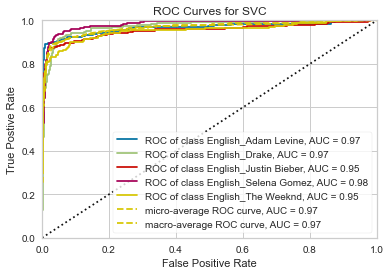

In [186]:
roc_auc(svc_english_artist, x_train_english_artist, y_train_english_artist, X_test = x_test_english_artist, y_test = y_test_english_artist)
plt.show()

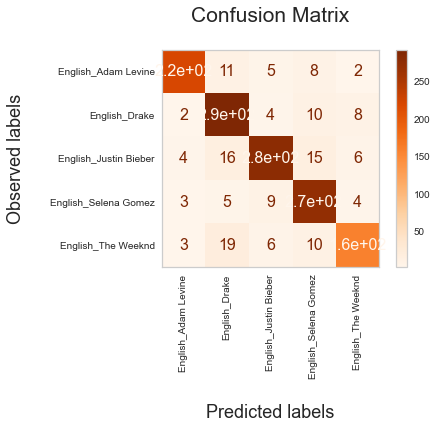

In [187]:
confusion_matrix_plot(svc_english_artist, x_test_english_artist, y_test_english_artist)

### KNN

In [188]:
knn_english_artist = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean', p=2)
# knn_english_artist = KNeighborsClassifier()

In [189]:
knn_english_artist.fit(x_train_english_artist, y_train_english_artist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [190]:
display_metrics("K-Nearest Neighbors", "English", "Artist", "Without", knn_english_artist, x_test_english_artist, y_test_english_artist)

K-Nearest Neighbors Classifier Model - English Artist : Without Hyper-parameter Tuning
Accuracy Score  :  0.8244719592134013
Precision Score :  0.8265343452723443
Recall Score    :  0.8244719592134013
F1 Score        :  0.8232087479580582


In [191]:
param_grid = [{ 'n_neighbors': range(1,16), 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}]

classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy',
                               return_train_score=True,n_jobs=2)

grid_search_knn.fit(x_train_english_artist, y_train_english_artist)
print("Best Paremeters are:", grid_search_knn.best_params_)

Best Paremeters are: {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}


In [192]:
knn_english_artist = KNeighborsClassifier(**grid_search_knn.best_params_)
knn_english_artist.fit(x_train_english_artist, y_train_english_artist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [193]:
display_metrics("K-Nearest Neighbors", "English", "Artist", "With", knn_english_artist, x_test_english_artist, y_test_english_artist)

K-Nearest Neighbors Classifier Model - English Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8230152949745084
Precision Score :  0.8233995063980882
Recall Score    :  0.8230152949745084
F1 Score        :  0.8223060710070257


C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


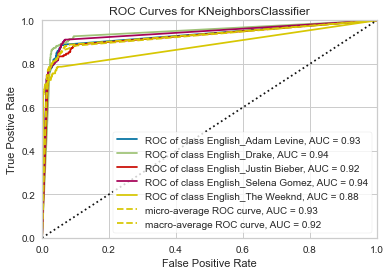

In [194]:
roc_auc(knn_english_artist, x_train_english_artist, y_train_english_artist, X_test = x_test_english_artist, y_test = y_test_english_artist)
plt.show()

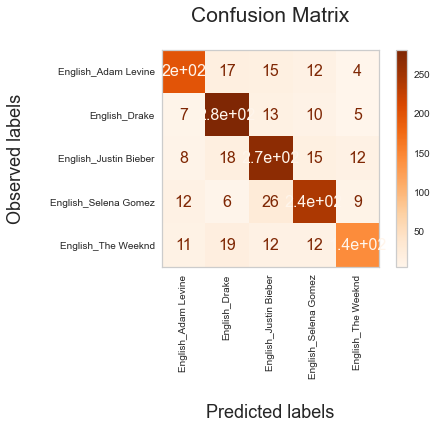

In [195]:
confusion_matrix_plot(knn_english_artist, x_test_english_artist, y_test_english_artist)

### Voting classifier

In [198]:
# Voting classifier(SVC, KNeighborsClassifier)
svc_clf = SVC(**grid_search_svc.best_params_)
knn_clf = KNeighborsClassifier(**grid_search_knn.best_params_)

voting_clf = VotingClassifier(
    estimators=[('svc',svc_clf),('knn', knn_clf),],
    voting='hard')
# cross_val_scores = cross_validate(voting_clf, x_train_english_artist, y_train_english_artist, cv=10, scoring='recall_weighted')
voting_clf.fit(x_train_english_artist, y_train_english_artist)
y_pred_vc = voting_clf.predict(x_test_english_artist)
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(x_train_english_artist, y_train_english_artist)
    y_pred = clf.predict(x_test_english_artist)
    model=clf.__class__.__name__ if clf!=voting_clf else clf.__class__.__name__
    display_metrics(model, "English", "Artist", "With", clf, x_test_english_artist, y_test_english_artist)

SVC Classifier Model - English Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8907501820830298
Precision Score :  0.8928815749284004
Recall Score    :  0.8907501820830298
F1 Score        :  0.8906474115570541
KNeighborsClassifier Classifier Model - English Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8230152949745084
Precision Score :  0.8233995063980882
Recall Score    :  0.8230152949745084
F1 Score        :  0.8223060710070257
VotingClassifier Classifier Model - English Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8601602330662782
Precision Score :  0.8653548185205533
Recall Score    :  0.8601602330662782
F1 Score        :  0.858759910836728


## Telugu Artists

In [199]:
artist_data_telugu  = artist_data[artist_data['target'].isin(['Telugu_geetha',
                                                              'Telugu_armaan',
                                                              'Telugu_anurag',
                                                              'Telugu_sidsriram'])]

artist_data_telugu['target'].value_counts()

Telugu_geetha       1162
Telugu_armaan        705
Telugu_anurag        468
Telugu_sidsriram     365
Name: target, dtype: int64

In [200]:
train_data_telugu_artist, test_data_telugu_artist = train_test_split_func(artist_data_telugu, artist_data_telugu['target'], 0.2, 42)

In [201]:
x_train_telugu_artist = train_data_telugu_artist.drop(['target'], 1).copy()
x_test_telugu_artist  = test_data_telugu_artist.drop(['target'], 1).copy()

y_train_telugu_artist = train_data_telugu_artist['target'].copy()
y_test_telugu_artist  = test_data_telugu_artist['target'].copy()

### SVM

In [202]:
svc_telugu_artist = SVC(random_state = 42, kernel = 'poly', gamma = 'auto', class_weight = 'balanced', break_ties = True)
# svc_telugu_artist = SVC(random_state = 42, kernel = 'poly')

In [203]:
svc_telugu_artist.fit(x_train_telugu_artist, y_train_telugu_artist)

SVC(C=1.0, break_ties=True, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [204]:
display_metrics("Support Vector Machine", "Telugu", "Artist", "Without", svc_telugu_artist, x_test_telugu_artist, y_test_telugu_artist)

Support Vector Machine Classifier Model - Telugu Artist : Without Hyper-parameter Tuning
Accuracy Score  :  0.7759259259259259
Precision Score :  0.7755693483471262
Recall Score    :  0.7759259259259259
F1 Score        :  0.773471224462908


In [205]:
param_grid = [{ 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[x * 1.0 for x in range(1,5)], 'gamma':['scale','auto']}]

classifier = SVC()
grid_search_svc = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy', return_train_score=True,n_jobs=2)

grid_search_svc.fit(x_train_telugu_artist, y_train_telugu_artist)
print("Best Paremeters are:", grid_search_svc.best_params_)

Best Paremeters are: {'C': 2.0, 'gamma': 'auto', 'kernel': 'rbf'}


In [206]:
svc_telugu_artist = SVC(**grid_search_svc.best_params_)
svc_telugu_artist.fit(x_train_telugu_artist, y_train_telugu_artist)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [207]:
display_metrics("Support Vector Machine", "Telugu", "Artist", "With", svc_telugu_artist, x_test_telugu_artist, y_test_telugu_artist)

Support Vector Machine Classifier Model - Telugu Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8074074074074075
Precision Score :  0.8081521530212543
Recall Score    :  0.8074074074074075
F1 Score        :  0.803410640857289


In [349]:
### no need to run again
# saving the model
import pickle
pickle_out = open("telugu_artist_classifier.pkl", mode = "wb")
pickle.dump(svc_telugu_artist, pickle_out)
pickle_out.close()

C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


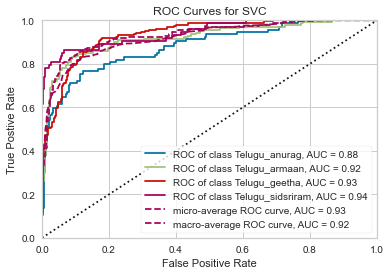

In [208]:
roc_auc(svc_telugu_artist, x_train_telugu_artist, y_train_telugu_artist, X_test = x_test_telugu_artist, y_test = y_test_telugu_artist)
plt.show()

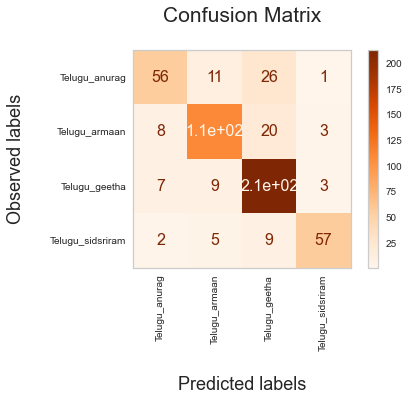

In [209]:
confusion_matrix_plot(svc_telugu_artist, x_test_telugu_artist, y_test_telugu_artist)

### KNN

In [210]:
knn_telugu_artist = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean', p=2)
# knn_telugu_artist = KNeighborsClassifier()

In [211]:
knn_telugu_artist.fit(x_train_telugu_artist, y_train_telugu_artist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [212]:
display_metrics("K-Nearest Neighbors", "Telugu", "Artist", "Without", knn_telugu_artist, x_test_telugu_artist, y_test_telugu_artist)

K-Nearest Neighbors Classifier Model - Telugu Artist : Without Hyper-parameter Tuning
Accuracy Score  :  0.7462962962962963
Precision Score :  0.7467172859886775
Recall Score    :  0.7462962962962963
F1 Score        :  0.7403040748224005


In [213]:
param_grid = [{ 'n_neighbors': range(1,16), 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}]

classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy',
                               return_train_score=True,n_jobs=2)

grid_search_knn.fit(x_train_telugu_artist, y_train_telugu_artist)
print("Best Paremeters are:", grid_search_knn.best_params_)

Best Paremeters are: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [214]:
knn_telugu_artist = KNeighborsClassifier(**grid_search_knn.best_params_)
knn_telugu_artist.fit(x_train_telugu_artist, y_train_telugu_artist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [215]:
display_metrics("K-Nearest Neighbors", "Telugu", "Artist", "With", knn_telugu_artist, x_test_telugu_artist, y_test_telugu_artist)

K-Nearest Neighbors Classifier Model - Telugu Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.7666666666666667
Precision Score :  0.7636559013017675
Recall Score    :  0.7666666666666667
F1 Score        :  0.7638909945853518


C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


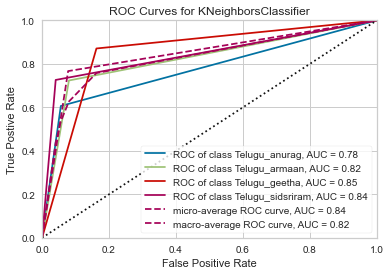

In [216]:
roc_auc(knn_telugu_artist, x_train_telugu_artist, y_train_telugu_artist, X_test = x_test_telugu_artist, y_test = y_test_telugu_artist)
plt.show()

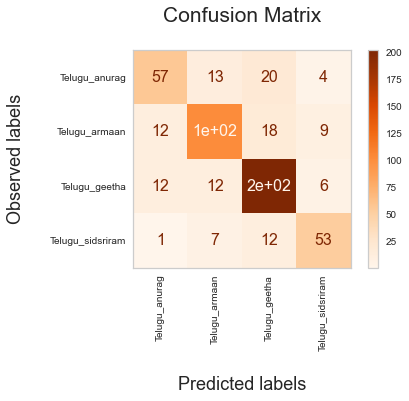

In [217]:
confusion_matrix_plot(knn_telugu_artist, x_test_telugu_artist, y_test_telugu_artist)

### Voting classifier

In [218]:
# Voting classifier(SVC, KNeighborsClassifier)
svc_clf = SVC(**grid_search_svc.best_params_)
knn_clf = KNeighborsClassifier(**grid_search_knn.best_params_)

voting_clf = VotingClassifier(
    estimators=[('svc',svc_clf),('knn', knn_clf),],
    voting='hard')
voting_clf.fit(x_train_telugu_artist, y_train_telugu_artist)
y_pred_vc = voting_clf.predict(x_test_telugu_artist)
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(x_train_telugu_artist, y_train_telugu_artist)
    y_pred = clf.predict(x_test_telugu_artist)
    model=clf.__class__.__name__ if clf!=voting_clf else clf.__class__.__name__
    display_metrics(model, "Telugu", "Artist", "With", clf, x_test_telugu_artist, y_test_telugu_artist)

SVC Classifier Model - Telugu Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8074074074074075
Precision Score :  0.8081521530212543
Recall Score    :  0.8074074074074075
F1 Score        :  0.803410640857289
KNeighborsClassifier Classifier Model - Telugu Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.7666666666666667
Precision Score :  0.7636559013017675
Recall Score    :  0.7666666666666667
F1 Score        :  0.7638909945853518
VotingClassifier Classifier Model - Telugu Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.7925925925925926
Precision Score :  0.800532282893672
Recall Score    :  0.7925925925925926
F1 Score        :  0.7933841530793211


## Hindi Artists

In [219]:
artist_data_hindi   = artist_data[artist_data['target'].isin(['Hindi_sonunigam',
                                                              'Hindi_arijit',
                                                              'Hindi_atifaslam'])]

artist_data_hindi['target'].value_counts()

Hindi_sonunigam    1326
Hindi_arijit       1168
Hindi_atifaslam    1060
Name: target, dtype: int64

In [220]:
train_data_hindi_artist, test_data_hindi_artist = train_test_split_func(artist_data_hindi, artist_data_hindi['target'], 0.2, 42)

In [221]:
x_train_hindi_artist = train_data_hindi_artist.drop(['target'], 1).copy()
x_test_hindi_artist  = test_data_hindi_artist.drop(['target'], 1).copy()

y_train_hindi_artist = train_data_hindi_artist['target'].copy()
y_test_hindi_artist  = test_data_hindi_artist['target'].copy()

### SVM

In [222]:
svc_hindi_artist = SVC(random_state = 42, kernel = 'poly', gamma = 'auto', class_weight = 'balanced', break_ties = True)
# svc_hindi_artist = SVC(random_state = 42, kernel = 'poly')

In [223]:
svc_hindi_artist.fit(x_train_hindi_artist, y_train_hindi_artist)

SVC(C=1.0, break_ties=True, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [224]:
display_metrics("Support Vector Machine", "Hindi", "Artist", "Without", svc_hindi_artist, x_test_hindi_artist, y_test_hindi_artist)

Support Vector Machine Classifier Model - Hindi Artist : Without Hyper-parameter Tuning
Accuracy Score  :  0.8326300984528833
Precision Score :  0.833895404531577
Recall Score    :  0.8326300984528833
F1 Score        :  0.8328031235028428


In [225]:
param_grid = [{ 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[x * 1.0 for x in range(1,5)], 'gamma':['scale','auto']}]

classifier = SVC()
grid_search_svc = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy', return_train_score=True,n_jobs=2)

grid_search_svc.fit(x_train_hindi_artist, y_train_hindi_artist)
print("Best Paremeters are:", grid_search_svc.best_params_)

Best Paremeters are: {'C': 2.0, 'gamma': 'auto', 'kernel': 'rbf'}


In [226]:
svc_hindi_artist = SVC(**grid_search_svc.best_params_)
svc_hindi_artist.fit(x_train_hindi_artist, y_train_hindi_artist)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [227]:
display_metrics("Support Vector Machine", "Hindi", "Artist", "With", svc_hindi_artist, x_test_hindi_artist, y_test_hindi_artist)

Support Vector Machine Classifier Model - Hindi Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8509142053445851
Precision Score :  0.8536928267814344
Recall Score    :  0.8509142053445851
F1 Score        :  0.8513166299255486


In [350]:
### no need to run again
# saving the model
import pickle
pickle_out = open("hindi_artist_classifier.pkl", mode = "wb")
pickle.dump(svc_hindi_artist, pickle_out)
pickle_out.close()

C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


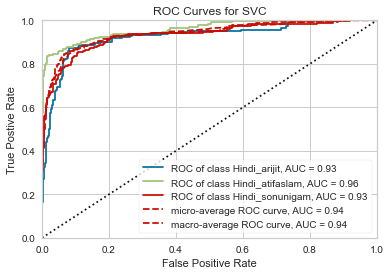

In [228]:
roc_auc(svc_hindi_artist, x_train_hindi_artist, y_train_hindi_artist, X_test = x_test_hindi_artist, y_test = y_test_hindi_artist)
plt.show()

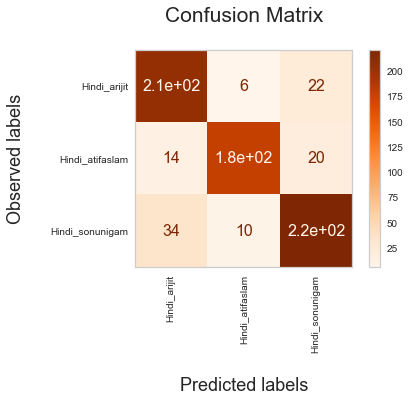

In [229]:
confusion_matrix_plot(svc_hindi_artist, x_test_hindi_artist, y_test_hindi_artist)

### KNN

In [230]:
knn_hindi_artist = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean', p=2)
# knn_hindi_artist = KNeighborsClassifier()

In [231]:
knn_hindi_artist.fit(x_train_hindi_artist, y_train_hindi_artist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [232]:
display_metrics("K-Nearest Neighbors", "Hindi", "Artist", "Without", knn_hindi_artist, x_test_hindi_artist, y_test_hindi_artist)

K-Nearest Neighbors Classifier Model - Hindi Artist : Without Hyper-parameter Tuning
Accuracy Score  :  0.7777777777777778
Precision Score :  0.7823694537727985
Recall Score    :  0.7777777777777778
F1 Score        :  0.7787795289717667


In [233]:
param_grid = [{ 'n_neighbors': range(1,16), 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}]

classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy',
                               return_train_score=True,n_jobs=2)

grid_search_knn.fit(x_train_hindi_artist, y_train_hindi_artist)
print("Best Paremeters are:", grid_search_knn.best_params_)

Best Paremeters are: {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}


In [234]:
knn_hindi_artist = KNeighborsClassifier(**grid_search_knn.best_params_)
knn_hindi_artist.fit(x_train_hindi_artist, y_train_hindi_artist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [235]:
display_metrics("K-Nearest Neighbors", "English", "Artist", "With", knn_hindi_artist, x_test_hindi_artist, y_test_hindi_artist)

K-Nearest Neighbors Classifier Model - English Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8143459915611815
Precision Score :  0.8175946579353269
Recall Score    :  0.8143459915611815
F1 Score        :  0.8152859316064496


C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


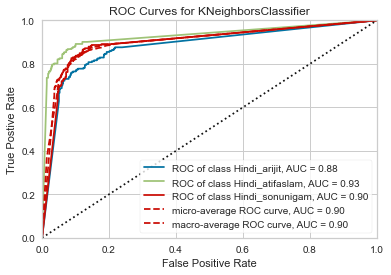

In [236]:
roc_auc(knn_hindi_artist, x_train_hindi_artist, y_train_hindi_artist, X_test = x_test_hindi_artist, y_test = y_test_hindi_artist)
plt.show()

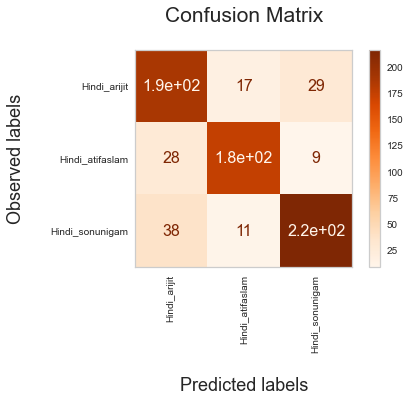

In [237]:
confusion_matrix_plot(knn_hindi_artist, x_test_hindi_artist, y_test_hindi_artist)

### Voting classifier

In [238]:
# Voting classifier(SVC, KNeighborsClassifier)
svc_clf = SVC(**grid_search_svc.best_params_)
knn_clf = KNeighborsClassifier(**grid_search_knn.best_params_)

voting_clf = VotingClassifier(
    estimators=[('svc',svc_clf),('knn', knn_clf),],
    voting='hard')
voting_clf.fit(x_train_hindi_artist, y_train_hindi_artist)
y_pred_vc = voting_clf.predict(x_test_hindi_artist)
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(x_train_hindi_artist, y_train_hindi_artist)
    y_pred = clf.predict(x_test_hindi_artist)
    model=clf.__class__.__name__ if clf!=voting_clf else clf.__class__.__name__
    display_metrics(model, "English", "Artist", "With", clf, x_test_hindi_artist, y_test_hindi_artist)

SVC Classifier Model - English Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8509142053445851
Precision Score :  0.8536928267814344
Recall Score    :  0.8509142053445851
F1 Score        :  0.8513166299255486
KNeighborsClassifier Classifier Model - English Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8143459915611815
Precision Score :  0.8175946579353269
Recall Score    :  0.8143459915611815
F1 Score        :  0.8152859316064496
VotingClassifier Classifier Model - English Artist : With Hyper-parameter Tuning
Accuracy Score  :  0.8340365682137834
Precision Score :  0.8543209721424537
Recall Score    :  0.8340365682137834
F1 Score        :  0.835734798723691


## All language Artists together

In [239]:
train_data_all_artists, test_data_all_artists = train_test_split_func(artist_data, artist_data['target'], 0.2, 42)

In [240]:
x_train_all_artists = train_data_all_artists.drop(['target'], 1).copy()
x_test_all_artists  = test_data_all_artists.drop(['target'], 1).copy()

y_train_all_artists = train_data_all_artists['target'].copy()
y_test_all_artists  = test_data_all_artists['target'].copy()

## SVM

In [241]:
svc_all_artists = SVC(random_state = 42, kernel = 'poly', gamma = 'auto', class_weight = 'balanced', break_ties = True)
# svc_all_artists = SVC(random_state = 42, kernel = 'poly')

In [242]:
svc_all_artists.fit(x_train_all_artists, y_train_all_artists)

SVC(C=1.0, break_ties=True, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [243]:
display_metrics("Support Vector Machine", "All", "Artists", "Without", svc_all_artists, x_test_all_artists, y_test_all_artists)

Support Vector Machine Classifier Model - All Artists : Without Hyper-parameter Tuning
Accuracy Score  :  0.7820121951219512
Precision Score :  0.785806249178206
Recall Score    :  0.7820121951219512
F1 Score        :  0.7817117653231054


In [244]:
param_grid = [{ 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[x * 1.0 for x in range(1,5)], 'gamma':['scale','auto']}]

classifier = SVC()
grid_search_svc = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy', return_train_score=True,n_jobs=2)

grid_search_svc.fit(x_train_all_artists, y_train_all_artists)
print("Best Paremeters are:", grid_search_svc.best_params_)


Best Paremeters are: {'C': 4.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [245]:
svc_all_artists = SVC(**grid_search_svc.best_params_)
svc_all_artists.fit(x_train_all_artists, y_train_all_artists)

SVC(C=4.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [246]:
display_metrics("Support Vector Machine", "All", "Artists", "With", svc_all_artists, x_test_all_artists, y_test_all_artists)

Support Vector Machine Classifier Model - All Artists : With Hyper-parameter Tuning
Accuracy Score  :  0.8117378048780488
Precision Score :  0.8154011728809633
Recall Score    :  0.8117378048780488
F1 Score        :  0.8110103210597711


In [351]:
### no need to run again
# saving the model
import pickle
pickle_out = open("all_artists_classifier.pkl", mode = "wb")
pickle.dump(svc_all_artists, pickle_out)
pickle_out.close()

C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


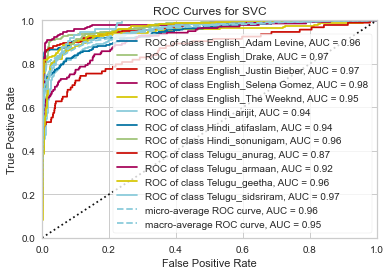

In [247]:
roc_auc(svc_all_artists, x_train_all_artists, y_train_all_artists, X_test = x_test_all_artists, y_test = y_test_all_artists)
plt.show()

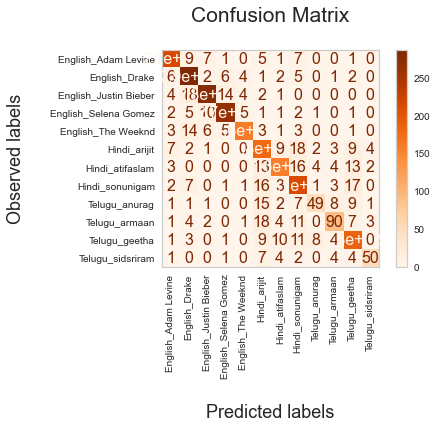

In [248]:
confusion_matrix_plot(svc_all_artists, x_test_all_artists, y_test_all_artists)

## KNN

In [249]:
knn_all_artists = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean', p=2)
# knn_all_artists = KNeighborsClassifier()

In [250]:
knn_all_artists.fit(x_train_all_artists, y_train_all_artists)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [251]:
display_metrics("K-Nearest Neighbors", "All", "Artists", "Without", knn_all_artists, x_test_all_artists, y_test_all_artists)

K-Nearest Neighbors Classifier Model - All Artists : Without Hyper-parameter Tuning
Accuracy Score  :  0.7252286585365854
Precision Score :  0.7259846898050654
Recall Score    :  0.7252286585365854
F1 Score        :  0.7227872985592586


In [252]:
param_grid = [{ 'n_neighbors': range(1,16), 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}]

classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy',
                               return_train_score=True,n_jobs=2)

grid_search_knn.fit(x_train_all_artists, y_train_all_artists)
print("Best Paremeters are:", grid_search_knn.best_params_)

Best Paremeters are: {'algorithm': 'brute', 'n_neighbors': 1, 'weights': 'uniform'}


In [253]:
knn_all_artists = KNeighborsClassifier(**grid_search_knn.best_params_)
knn_all_artists.fit(x_train_all_artists, y_train_all_artists)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [254]:
display_metrics("K-Nearest Neighbors", "All", "Artists", "With", knn_all_artists, x_test_all_artists, y_test_all_artists)

K-Nearest Neighbors Classifier Model - All Artists : With Hyper-parameter Tuning
Accuracy Score  :  0.7397103658536586
Precision Score :  0.7400476110926403
Recall Score    :  0.7397103658536586
F1 Score        :  0.7389807978430442


C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


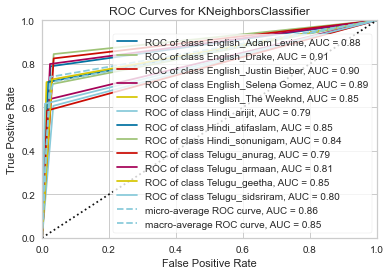

In [255]:
roc_auc(knn_all_artists, x_train_all_artists, y_train_all_artists, X_test = x_test_all_artists, y_test = y_test_all_artists)
plt.show()

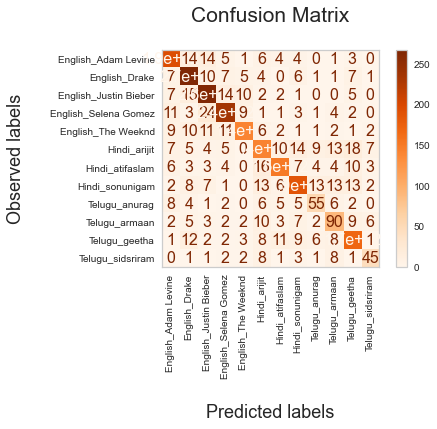

In [256]:
confusion_matrix_plot(knn_all_artists, x_test_all_artists, y_test_all_artists)

### Voting classifier

In [346]:
# Voting classifier(SVC, KNeighborsClassifier)
svc_clf = SVC(**grid_search_svc.best_params_)
knn_clf = KNeighborsClassifier(**grid_search_knn.best_params_)

voting_clf = VotingClassifier(
    estimators=[('svc',svc_clf),('knn', knn_clf),],
    voting='hard')
voting_clf.fit(x_train_all_artists, y_train_all_artists)
y_pred_vc = voting_clf.predict(x_test_all_artists)
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(x_train_all_artists, y_train_all_artists)
    y_pred = clf.predict(x_test_all_artists)
    model=clf.__class__.__name__ if clf!=voting_clf else clf.__class__.__name__
    display_metrics(model, "All", "Artists", "With", clf, x_test_all_artists, y_test_all_artists)

SVC Classifier Model - All Artists : With Hyper-parameter Tuning
Accuracy Score  :  0.8105945121951219
Precision Score :  0.8168015089641503
Recall Score    :  0.8105945121951219
F1 Score        :  0.8103796748526317
KNeighborsClassifier Classifier Model - All Artists : With Hyper-parameter Tuning
Accuracy Score  :  0.739329268292683
Precision Score :  0.7399526079903096
Recall Score    :  0.739329268292683
F1 Score        :  0.738707340829564
VotingClassifier Classifier Model - All Artists : With Hyper-parameter Tuning
Accuracy Score  :  0.776295731707317
Precision Score :  0.7882488486637061
Recall Score    :  0.776295731707317
F1 Score        :  0.7746456710935287


# Genre Data Classification

In [258]:
genre_data = pd.read_csv('Genre_Data_PCA.csv')

In [259]:
genre_data.shape

(9659, 92)

In [260]:
genre_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,81,82,83,84,85,86,87,88,89,target
0,0,5.981779,0.877041,6.125297,2.589149,5.042832,5.892499,-3.552737,2.189388,-4.451867,...,-2.018604,-0.224472,-0.562292,0.914119,-1.034346,0.947299,1.131462,-0.051413,0.519872,English_HipHopParty
1,1,6.127472,1.245377,5.972584,3.089422,4.220182,5.213958,-2.468576,1.874529,-3.975218,...,-1.106540,-0.095864,0.137479,0.279392,-0.715812,0.551319,0.602541,-0.384802,0.321413,English_HipHopParty
2,2,5.172627,1.414000,6.536934,2.903600,1.707707,3.514837,-1.150563,1.694019,-2.869184,...,-0.497019,0.013177,-0.244138,0.722465,-0.622286,-0.141013,0.406096,0.145804,0.047461,English_HipHopParty
3,3,3.827175,4.207265,3.274808,2.983916,1.573987,3.390338,0.786223,1.544706,-3.372448,...,-0.231228,-0.089365,0.031927,0.929269,-0.456640,-0.460912,0.330757,0.407672,-0.247432,English_HipHopParty
4,4,-1.856591,3.859385,1.894855,1.670821,4.706613,3.945676,0.072540,1.970401,-3.121050,...,-0.131538,0.166438,0.312505,0.345820,-0.869161,0.445305,-0.197545,-0.150402,0.130008,English_HipHopParty


In [261]:
genre_data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', 'target'],
      dtype='object')

In [262]:
genre_data['target'].value_counts()

Telugu_romantic        1263
English_Rock           1188
Telugu_workout         1133
Hindi_workout          1021
English_HipHopParty    1017
English_Romantic        895
English_Workout         842
Hindi_romantic          842
Hindi_rock              810
Telugu_rock             648
Name: target, dtype: int64

In [263]:
genre_data = genre_data.drop(['Unnamed: 0'], 1)

In [264]:
genre_data

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,target
0,5.981779,0.877041,6.125297,2.589149,5.042832,5.892499,-3.552737,2.189388,-4.451867,2.051966,...,-2.018604,-0.224472,-0.562292,0.914119,-1.034346,0.947299,1.131462,-0.051413,0.519872,English_HipHopParty
1,6.127472,1.245377,5.972584,3.089422,4.220182,5.213958,-2.468576,1.874529,-3.975218,2.315908,...,-1.106540,-0.095864,0.137479,0.279392,-0.715812,0.551319,0.602541,-0.384802,0.321413,English_HipHopParty
2,5.172627,1.414000,6.536934,2.903600,1.707707,3.514837,-1.150563,1.694019,-2.869184,1.096035,...,-0.497019,0.013177,-0.244138,0.722465,-0.622286,-0.141013,0.406096,0.145804,0.047461,English_HipHopParty
3,3.827175,4.207265,3.274808,2.983916,1.573987,3.390338,0.786223,1.544706,-3.372448,1.352711,...,-0.231228,-0.089365,0.031927,0.929269,-0.456640,-0.460912,0.330757,0.407672,-0.247432,English_HipHopParty
4,-1.856591,3.859385,1.894855,1.670821,4.706613,3.945676,0.072540,1.970401,-3.121050,1.876197,...,-0.131538,0.166438,0.312505,0.345820,-0.869161,0.445305,-0.197545,-0.150402,0.130008,English_HipHopParty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,-6.618211,2.883914,-1.016200,0.172564,1.667314,-1.513375,-0.206387,2.916613,0.623159,-0.293147,...,0.324831,0.549678,-0.259842,0.052065,-0.420876,0.054632,0.540467,0.343659,0.300333,Hindi_workout
9655,-0.640804,4.316761,-1.296991,0.176203,-0.605642,-1.045169,-0.875904,-0.172053,0.981086,0.536684,...,-0.043514,0.414280,-0.005911,0.386658,-0.343324,-0.200533,0.065633,-0.352626,-0.085273,Hindi_workout
9656,-7.226851,2.756424,-0.959958,-0.236669,1.213691,-1.237655,-0.085488,2.295629,0.845713,-0.304457,...,0.213650,0.574046,-0.314511,0.007616,-0.259054,0.211568,0.734024,0.366474,-0.076196,Hindi_workout
9657,-2.440780,5.049502,-1.469538,1.315564,-0.036805,-0.974384,-0.255943,0.951608,1.106300,-0.341796,...,0.438885,0.184271,-0.448204,0.153991,-0.146407,-0.169866,-0.135135,0.203300,0.247324,Hindi_workout


## English Genre

In [265]:
genre_data_english = genre_data[genre_data['target'].isin(['English_Rock',
                                                           'English_Romantic',
                                                           'English_Workout',
                                                           'English_HipHopParty'])]

genre_data_english['target'].value_counts()

English_Rock           1188
English_HipHopParty    1017
English_Romantic        895
English_Workout         842
Name: target, dtype: int64

In [266]:
train_data_english_genre, test_data_english_genre = train_test_split_func(genre_data_english, genre_data_english['target'], 0.2, 42)

In [267]:
x_train_english_genre = train_data_english_genre.drop(['target'], 1).copy()
x_test_english_genre  = test_data_english_genre.drop(['target'], 1).copy()

y_train_english_genre = train_data_english_genre['target'].copy()
y_test_english_genre  = test_data_english_genre['target'].copy()

### SVM

In [268]:
svc_english_genre = SVC(random_state = 42, kernel = 'poly', gamma = 'auto', class_weight = 'balanced', break_ties = True)
# svc_english_genre = SVC(random_state = 42, kernel = 'poly')

In [269]:
svc_english_genre.fit(x_train_english_genre, y_train_english_genre)

SVC(C=1.0, break_ties=True, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [270]:
display_metrics("Support Vector Machine", "English", "Genre", "Without", svc_english_genre, x_test_english_genre, y_test_english_genre)

Support Vector Machine Classifier Model - English Genre : Without Hyper-parameter Tuning
Accuracy Score  :  0.944233206590621
Precision Score :  0.9451241495679956
Recall Score    :  0.944233206590621
F1 Score        :  0.9441503038134288


In [271]:
param_grid = [{ 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[x * 1.0 for x in range(1,5)], 'gamma':['scale','auto']}]

classifier = SVC()
grid_search_svc = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy', return_train_score=True,n_jobs=2)

grid_search_svc.fit(x_train_english_genre, y_train_english_genre)
print("Best Paremeters are:", grid_search_svc.best_params_)

Best Paremeters are: {'C': 4.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [272]:
svc_english_genre = SVC(**grid_search_svc.best_params_)
svc_english_genre.fit(x_train_english_genre, y_train_english_genre)

SVC(C=4.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [273]:
display_metrics("Support Vector Machine", "English", "Genre", "With", svc_english_genre, x_test_english_genre, y_test_english_genre)

Support Vector Machine Classifier Model - English Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.9543726235741445
Precision Score :  0.9543868248322609
Recall Score    :  0.9543726235741445
F1 Score        :  0.9543423990749231


In [352]:
### no need to run again
# saving the model
import pickle
pickle_out = open("english_genre_classifier.pkl", mode = "wb")
pickle.dump(svc_english_genre, pickle_out)
pickle_out.close()

C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


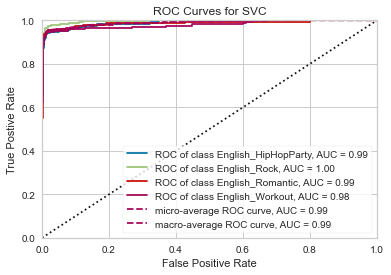

In [274]:
roc_auc(svc_english_genre, x_train_english_genre, y_train_english_genre, X_test = x_test_english_genre, y_test = y_test_english_genre)
plt.show()

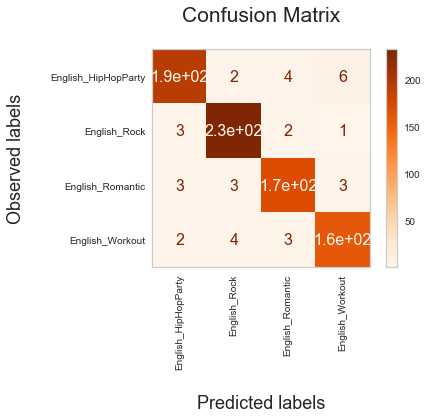

In [275]:
confusion_matrix_plot(svc_english_genre, x_test_english_genre, y_test_english_genre)

### KNN

In [276]:
knn_english_genre = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean', p=2)
# knn_english_genre = KNeighborsClassifier()

In [277]:
knn_english_genre.fit(x_train_english_genre, y_train_english_genre)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [278]:
display_metrics("K-Nearest Neighbors", "English", "Genre", "Without", knn_english_genre, x_test_english_genre, y_test_english_genre)

K-Nearest Neighbors Classifier Model - English Genre : Without Hyper-parameter Tuning
Accuracy Score  :  0.9328263624841572
Precision Score :  0.933465322957128
Recall Score    :  0.9328263624841572
F1 Score        :  0.9327395847295066


In [279]:
param_grid = [{ 'n_neighbors': range(1,16), 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}]

classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy',
                               return_train_score=True,n_jobs=2)

grid_search_knn.fit(x_train_english_genre, y_train_english_genre)
print("Best Paremeters are:", grid_search_knn.best_params_)

Best Paremeters are: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [280]:
knn_english_genre = KNeighborsClassifier(**grid_search_knn.best_params_)
knn_english_genre.fit(x_train_english_genre, y_train_english_genre)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [281]:
display_metrics("K-Nearest Neighbors", "English", "Genre", "With", knn_english_genre, x_test_english_genre, y_test_english_genre)

K-Nearest Neighbors Classifier Model - English Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.9569074778200254
Precision Score :  0.956967671039653
Recall Score    :  0.9569074778200254
F1 Score        :  0.9568755333073216


C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


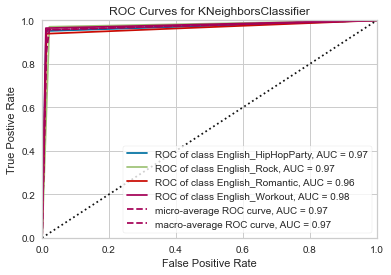

In [282]:
roc_auc(knn_english_genre, x_train_english_genre, y_train_english_genre, X_test = x_test_english_genre, y_test = y_test_english_genre)
plt.show()

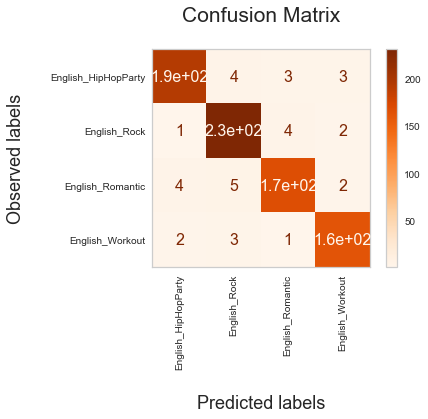

In [283]:
confusion_matrix_plot(knn_english_genre, x_test_english_genre, y_test_english_genre)

### Voting classifier

In [284]:
# Voting classifier(SVC, KNeighborsClassifier)
svc_clf = SVC(**grid_search_svc.best_params_)
knn_clf = KNeighborsClassifier(**grid_search_knn.best_params_)

voting_clf = VotingClassifier(
    estimators=[('svc',svc_clf),('knn', knn_clf),],
    voting='hard')
voting_clf.fit(x_train_english_genre, y_train_english_genre)
y_pred_vc = voting_clf.predict(x_test_english_genre)
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(x_train_english_genre, y_train_english_genre)
    y_pred = clf.predict(x_test_english_genre)
    model=clf.__class__.__name__ if clf!=voting_clf else clf.__class__.__name__
    display_metrics(model, "English", "Genre", "With", clf, x_test_english_genre, y_test_english_genre)

SVC Classifier Model - English Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.9543726235741445
Precision Score :  0.9543868248322609
Recall Score    :  0.9543726235741445
F1 Score        :  0.9543423990749231
KNeighborsClassifier Classifier Model - English Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.9569074778200254
Precision Score :  0.956967671039653
Recall Score    :  0.9569074778200254
F1 Score        :  0.9568755333073216
VotingClassifier Classifier Model - English Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.9569074778200254
Precision Score :  0.9577574357980376
Recall Score    :  0.9569074778200254
F1 Score        :  0.9568632775500313


## Telugu Genre

In [285]:
genre_data_telugu = genre_data[genre_data['target'].isin(['Telugu_rock',
                                                          'Telugu_romantic',
                                                          'Telugu_workout'])]

genre_data_telugu['target'].value_counts()

Telugu_romantic    1263
Telugu_workout     1133
Telugu_rock         648
Name: target, dtype: int64

In [286]:
train_data_telugu_genre, test_data_telugu_genre = train_test_split_func(genre_data_telugu, genre_data_telugu['target'], 0.2, 42)

In [287]:
x_train_telugu_genre = train_data_telugu_genre.drop(['target'], 1).copy()
x_test_telugu_genre  = test_data_telugu_genre.drop(['target'], 1).copy()

y_train_telugu_genre = train_data_telugu_genre['target'].copy()
y_test_telugu_genre  = test_data_telugu_genre['target'].copy()

### SVM

In [288]:
svc_telugu_genre = SVC(random_state = 42, kernel = 'poly', gamma = 'auto', class_weight = 'balanced', break_ties = True)
# svc_telugu_genre = SVC(random_state = 42, kernel = 'poly')

In [289]:
svc_telugu_genre.fit(x_train_telugu_genre, y_train_telugu_genre)

SVC(C=1.0, break_ties=True, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [290]:
display_metrics("Support Vector Machine", "Telugu", "Genre", "Without", svc_telugu_genre, x_test_telugu_genre, y_test_telugu_genre)

Support Vector Machine Classifier Model - Telugu Genre : Without Hyper-parameter Tuning
Accuracy Score  :  0.8719211822660099
Precision Score :  0.8775711492284471
Recall Score    :  0.8719211822660099
F1 Score        :  0.8735371586933667


In [291]:
param_grid = [{ 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[x * 1.0 for x in range(1,5)], 'gamma':['scale','auto']}]

classifier = SVC()
grid_search_svc = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy', return_train_score=True,n_jobs=2)

grid_search_svc.fit(x_train_telugu_genre, y_train_telugu_genre)
print("Best Paremeters are:", grid_search_svc.best_params_)

Best Paremeters are: {'C': 3.0, 'gamma': 'auto', 'kernel': 'rbf'}


In [292]:
svc_telugu_genre = SVC(**grid_search_svc.best_params_)
svc_telugu_genre.fit(x_train_telugu_genre, y_train_telugu_genre)

SVC(C=3.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [293]:
display_metrics("Support Vector Machine", "Telugu", "Genre", "With", svc_telugu_genre, x_test_telugu_genre, y_test_telugu_genre)

Support Vector Machine Classifier Model - Telugu Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.8949096880131363
Precision Score :  0.8935570480373457
Recall Score    :  0.8949096880131363
F1 Score        :  0.8934144325309475


In [353]:
### no need to run again
# saving the model
import pickle
pickle_out = open("telugu_genre_classifier.pkl", mode = "wb")
pickle.dump(svc_telugu_genre, pickle_out)
pickle_out.close()

C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


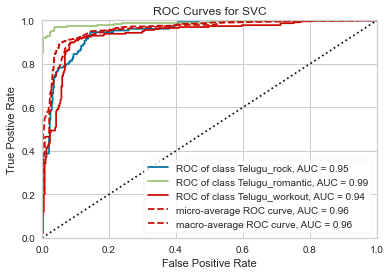

In [294]:
roc_auc(svc_telugu_genre, x_train_telugu_genre, y_train_telugu_genre, X_test = x_test_telugu_genre, y_test = y_test_telugu_genre)
plt.show()

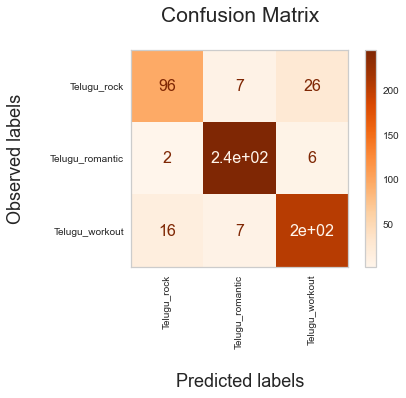

In [295]:
confusion_matrix_plot(svc_telugu_genre, x_test_telugu_genre, y_test_telugu_genre)

### KNN

In [296]:
knn_telugu_genre = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean', p=2)
# knn_telugu_genre = KNeighborsClassifier()

In [297]:
knn_telugu_genre.fit(x_train_telugu_genre, y_train_telugu_genre)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [298]:
display_metrics("K-Nearest Neighbors", "Telugu", "Genre", "Without", knn_telugu_genre, x_test_telugu_genre, y_test_telugu_genre)

K-Nearest Neighbors Classifier Model - Telugu Genre : Without Hyper-parameter Tuning
Accuracy Score  :  0.8702791461412152
Precision Score :  0.871546418896648
Recall Score    :  0.8702791461412152
F1 Score        :  0.8708503782778685


In [299]:
param_grid = [{ 'n_neighbors': range(1,16), 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}]

classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy',
                               return_train_score=True,n_jobs=2)

grid_search_knn.fit(x_train_telugu_genre, y_train_telugu_genre)
print("Best Paremeters are:", grid_search_knn.best_params_)

Best Paremeters are: {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}


In [300]:
knn_telugu_genre = KNeighborsClassifier(**grid_search_knn.best_params_)
knn_telugu_genre.fit(x_train_telugu_genre, y_train_telugu_genre)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [301]:
display_metrics("K-Nearest Neighbors", "Telugu", "Genre", "With", knn_telugu_genre, x_test_telugu_genre, y_test_telugu_genre)

K-Nearest Neighbors Classifier Model - Telugu Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.8801313628899836
Precision Score :  0.8845022002668126
Recall Score    :  0.8801313628899836
F1 Score        :  0.8817257881968313


C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


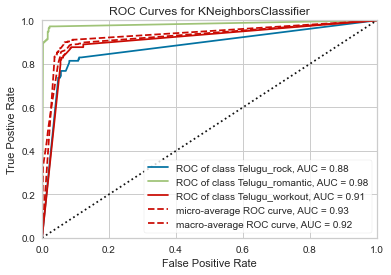

In [302]:
roc_auc(knn_telugu_genre, x_train_telugu_genre, y_train_telugu_genre, X_test = x_test_telugu_genre, y_test = y_test_telugu_genre)
plt.show()

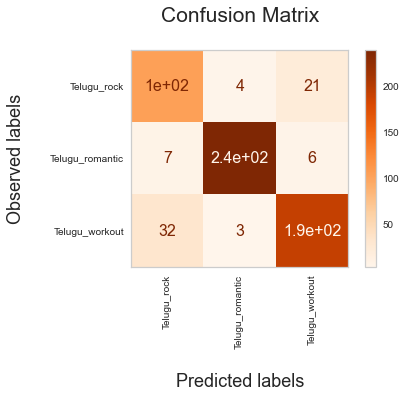

In [303]:
confusion_matrix_plot(knn_telugu_genre, x_test_telugu_genre, y_test_telugu_genre)

### Voting classifier

In [305]:
# Voting classifier(SVC, KNeighborsClassifier)
svc_clf = SVC(**grid_search_svc.best_params_)
knn_clf = KNeighborsClassifier(**grid_search_knn.best_params_)

voting_clf = VotingClassifier(
    estimators=[('svc',svc_clf),('knn', knn_clf),],
    voting='hard')
voting_clf.fit(x_train_telugu_genre, y_train_telugu_genre)
y_pred_vc = voting_clf.predict(x_test_telugu_genre)
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(x_train_telugu_genre, y_train_telugu_genre)
    y_pred = clf.predict(x_test_telugu_genre)
    model=clf.__class__.__name__ if clf!=voting_clf else clf.__class__.__name__
    display_metrics(model, "Telugu", "Genre", "With", clf, x_test_telugu_genre, y_test_telugu_genre)

SVC Classifier Model - Telugu Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.8949096880131363
Precision Score :  0.8935570480373457
Recall Score    :  0.8949096880131363
F1 Score        :  0.8934144325309475
KNeighborsClassifier Classifier Model - Telugu Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.8801313628899836
Precision Score :  0.8845022002668126
Recall Score    :  0.8801313628899836
F1 Score        :  0.8817257881968313
VotingClassifier Classifier Model - Telugu Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.8834154351395731
Precision Score :  0.8880483990872727
Recall Score    :  0.8834154351395731
F1 Score        :  0.8847977480990968


## Hindi Genre

In [306]:
genre_data_hindi = genre_data[genre_data['target'].isin(['Hindi_rock',
                                                         'Hindi_romantic',
                                                         'Hindi_workout'])]

genre_data_hindi['target'].value_counts()

Hindi_workout     1021
Hindi_romantic     842
Hindi_rock         810
Name: target, dtype: int64

In [307]:
train_data_hindi_genre, test_data_hindi_genre = train_test_split_func(genre_data_hindi, genre_data_hindi['target'], 0.2, 42)

In [308]:
x_train_hindi_genre = train_data_hindi_genre.drop(['target'], 1).copy()
x_test_hindi_genre  = test_data_hindi_genre.drop(['target'], 1).copy()

y_train_hindi_genre = train_data_hindi_genre['target'].copy()
y_test_hindi_genre  = test_data_hindi_genre['target'].copy()

### SVM

In [309]:
svc_hindi_genre = SVC(random_state = 42, kernel = 'poly', gamma = 'auto', class_weight = 'balanced', break_ties = True)
# svc_hindi_genre = SVC(random_state = 42, kernel = 'poly')

In [310]:
svc_hindi_genre.fit(x_train_hindi_genre, y_train_hindi_genre)

SVC(C=1.0, break_ties=True, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [311]:
display_metrics("Support Vector Machine", "Hindi", "Genre", "Without", svc_hindi_genre, x_test_hindi_genre, y_test_hindi_genre)

Support Vector Machine Classifier Model - Hindi Genre : Without Hyper-parameter Tuning
Accuracy Score  :  0.9439252336448598
Precision Score :  0.9444645038642163
Recall Score    :  0.9439252336448598
F1 Score        :  0.9439866394231676


In [312]:
param_grid = [{ 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[x * 1.0 for x in range(1,5)], 'gamma':['scale','auto']}]

classifier = SVC()
grid_search_svc = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy', return_train_score=True,n_jobs=2)

grid_search_svc.fit(x_train_hindi_genre, y_train_hindi_genre)
print("Best Paremeters are:", grid_search_svc.best_params_)

Best Paremeters are: {'C': 4.0, 'gamma': 'auto', 'kernel': 'rbf'}


In [313]:
svc_hindi_genre = SVC(**grid_search_svc.best_params_)
svc_hindi_genre.fit(x_train_hindi_genre, y_train_hindi_genre)

SVC(C=4.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [314]:
display_metrics("Support Vector Machine", "Hindi", "Genre", "With", svc_hindi_genre, x_test_hindi_genre, y_test_hindi_genre)

Support Vector Machine Classifier Model - Hindi Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.9551401869158879
Precision Score :  0.9554252773657379
Recall Score    :  0.9551401869158879
F1 Score        :  0.954976234190406


In [354]:
### no need to run again
# saving the model
import pickle
pickle_out = open("hindi_genre_classifier.pkl", mode = "wb")
pickle.dump(svc_hindi_genre, pickle_out)
pickle_out.close()

C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


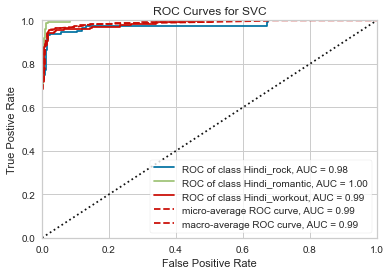

In [315]:
roc_auc(svc_hindi_genre, x_train_hindi_genre, y_train_hindi_genre, X_test = x_test_hindi_genre, y_test = y_test_hindi_genre)
plt.show()

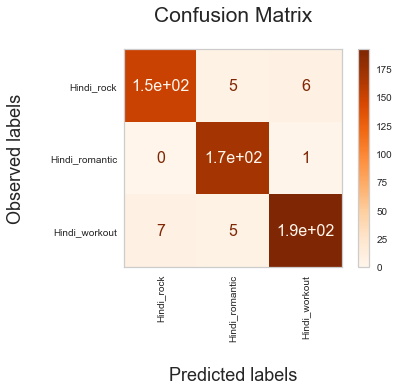

In [316]:
confusion_matrix_plot(svc_hindi_genre, x_test_hindi_genre, y_test_hindi_genre)

### KNN

In [317]:
knn_hindi_genre = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean', p=2)
# knn_hindi_genre = KNeighborsClassifier()

In [318]:
knn_hindi_genre.fit(x_train_hindi_genre, y_train_hindi_genre)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [319]:
display_metrics("K-Nearest Neighbors", "Hindi", "Genre", "Without", knn_hindi_genre, x_test_hindi_genre, y_test_hindi_genre)

K-Nearest Neighbors Classifier Model - Hindi Genre : Without Hyper-parameter Tuning
Accuracy Score  :  0.9476635514018692
Precision Score :  0.947700342105766
Recall Score    :  0.9476635514018692
F1 Score        :  0.947676589862341


In [320]:
param_grid = [{ 'n_neighbors': range(1,16), 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}]

classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy',
                               return_train_score=True,n_jobs=2)

grid_search_knn.fit(x_train_hindi_genre, y_train_hindi_genre)
print("Best Paremeters are:", grid_search_knn.best_params_)

Best Paremeters are: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [321]:
knn_hindi_genre = KNeighborsClassifier(**grid_search_knn.best_params_)
knn_hindi_genre.fit(x_train_hindi_genre, y_train_hindi_genre)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [322]:
display_metrics("K-Nearest Neighbors", "Hindi", "Genre", "With", knn_hindi_genre, x_test_hindi_genre, y_test_hindi_genre)

K-Nearest Neighbors Classifier Model - Hindi Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.9682242990654205
Precision Score :  0.968267386851958
Recall Score    :  0.9682242990654205
F1 Score        :  0.9682300067153253


C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


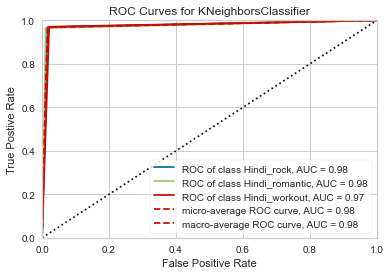

In [323]:
roc_auc(knn_hindi_genre, x_train_hindi_genre, y_train_hindi_genre, X_test = x_test_hindi_genre, y_test = y_test_hindi_genre)
plt.show()

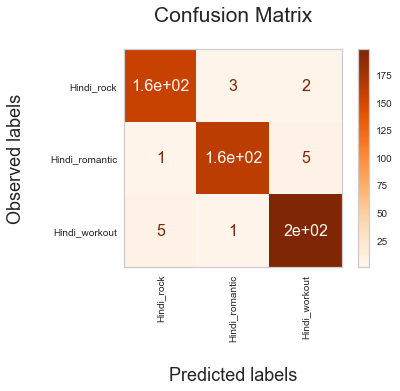

In [324]:
confusion_matrix_plot(knn_hindi_genre, x_test_hindi_genre, y_test_hindi_genre)

### Voting classifier

In [345]:
# Voting classifier(SVC, KNeighborsClassifier)
svc_clf = SVC(**grid_search_svc.best_params_)
knn_clf = KNeighborsClassifier(**grid_search_knn.best_params_)

voting_clf = VotingClassifier(
    estimators=[('svc',svc_clf),('knn', knn_clf),],
    voting='hard')
voting_clf.fit(x_train_hindi_genre, y_train_hindi_genre)
y_pred_vc = voting_clf.predict(x_test_hindi_genre)
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(x_train_hindi_genre, y_train_hindi_genre)
    y_pred = clf.predict(x_test_hindi_genre)
    model=clf.__class__.__name__ if clf!=voting_clf else clf.__class__.__name__
    display_metrics(model, "Hindi", "Genre", "With", clf, x_test_hindi_genre, y_test_hindi_genre)

SVC Classifier Model - Hindi Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.9551401869158879
Precision Score :  0.9554252773657379
Recall Score    :  0.9551401869158879
F1 Score        :  0.954976234190406
KNeighborsClassifier Classifier Model - Hindi Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.9682242990654205
Precision Score :  0.968267386851958
Recall Score    :  0.9682242990654205
F1 Score        :  0.9682300067153253
VotingClassifier Classifier Model - Hindi Genre : With Hyper-parameter Tuning
Accuracy Score  :  0.9607476635514018
Precision Score :  0.9620287101899123
Recall Score    :  0.9607476635514018
F1 Score        :  0.9606514082542551


## All language genres together

In [326]:
train_data_all_genres, test_data_all_genres = train_test_split_func(genre_data, genre_data['target'], 0.2, 42)

In [327]:
x_train_all_genres = train_data_all_genres.drop(['target'], 1).copy()
x_test_all_genres  = test_data_all_genres.drop(['target'], 1).copy()

y_train_all_genres = train_data_all_genres['target'].copy()
y_test_all_genres  = test_data_all_genres['target'].copy()

## SVM

In [328]:
svc_all_genres = SVC(random_state = 42, kernel = 'poly', gamma = 'auto', class_weight = 'balanced', break_ties = True)
# svc_all_genres = SVC()

In [329]:
svc_all_genres.fit(x_train_all_genres, y_train_all_genres)

SVC(C=1.0, break_ties=True, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [330]:
display_metrics("Support Vector Machine", "All", "Genres", "Without", svc_all_genres, x_test_all_genres, y_test_all_genres)

Support Vector Machine Classifier Model - All Genres : Without Hyper-parameter Tuning
Accuracy Score  :  0.8535196687370601
Precision Score :  0.8577411839823479
Recall Score    :  0.8535196687370601
F1 Score        :  0.8541991314261375


In [331]:
param_grid = [{ 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[x * 1.0 for x in range(1,5)], 'gamma':['scale','auto']}]

classifier = SVC()
grid_search_svc = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy', return_train_score=True,n_jobs=2)

grid_search_svc.fit(x_train_all_genres, y_train_all_genres)
print("Best Paremeters are:", grid_search_svc.best_params_)

Best Paremeters are: {'C': 4.0, 'gamma': 'auto', 'kernel': 'rbf'}


In [332]:
svc_all_genres = SVC(**grid_search_svc.best_params_)
svc_all_genres.fit(x_train_all_genres, y_train_all_genres)

SVC(C=4.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [333]:
display_metrics("Support Vector Machine", "All", "Genres", "With", svc_all_genres, x_test_all_genres, y_test_all_genres)

Support Vector Machine Classifier Model - All Genres : With Hyper-parameter Tuning
Accuracy Score  :  0.8933747412008282
Precision Score :  0.8929094734932078
Recall Score    :  0.8933747412008282
F1 Score        :  0.8924213078503924


In [355]:
### no need to run again
# saving the model
import pickle
pickle_out = open("all_genre_classifier.pkl", mode = "wb")
pickle.dump(svc_all_genres, pickle_out)
pickle_out.close()

C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


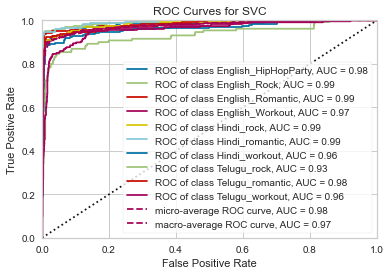

In [334]:
roc_auc(svc_all_genres, x_train_all_genres, y_train_all_genres, X_test = x_test_all_genres, y_test = y_test_all_genres)
plt.show()

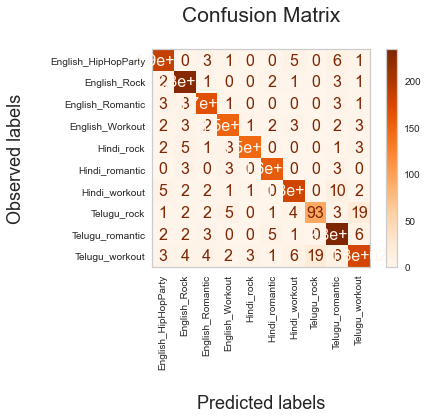

In [335]:
confusion_matrix_plot(svc_all_genres, x_test_all_genres, y_test_all_genres)

## KNN

In [336]:
knn_all_genres = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean', p=2)
# knn_all_genres = KNeighborsClassifier()

In [337]:
knn_all_genres.fit(x_train_all_genres, y_train_all_genres)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [338]:
display_metrics("K-Nearest Neighbors", "All", "Genres", "Without", knn_all_genres, x_test_all_genres, y_test_all_genres)

K-Nearest Neighbors Classifier Model - All Genres : Without Hyper-parameter Tuning
Accuracy Score  :  0.8597308488612836
Precision Score :  0.8607178203930688
Recall Score    :  0.8597308488612836
F1 Score        :  0.859525420724866


In [339]:
param_grid = [{ 'n_neighbors': range(1,16), 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}]

classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(classifier, param_grid, cv=5,
                               scoring='accuracy',
                               return_train_score=True,n_jobs=2)

grid_search_knn.fit(x_train_all_genres, y_train_all_genres)
print("Best Paremeters are:", grid_search_knn.best_params_)

Best Paremeters are: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [340]:
knn_all_genres = KNeighborsClassifier(**grid_search_knn.best_params_)
knn_all_genres.fit(x_train_all_genres, y_train_all_genres)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [341]:
display_metrics("K-Nearest Neighbors", "All", "Genres", "With", knn_all_genres, x_test_all_genres, y_test_all_genres)

K-Nearest Neighbors Classifier Model - All Genres : With Hyper-parameter Tuning
Accuracy Score  :  0.8830227743271222
Precision Score :  0.8833673181323687
Recall Score    :  0.8830227743271222
F1 Score        :  0.882832394896733


C:\Users\12678\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


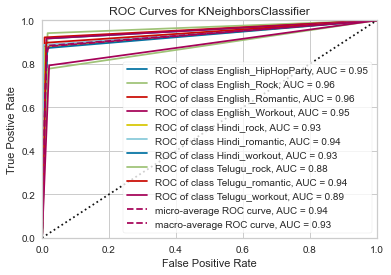

In [342]:
roc_auc(knn_all_genres, x_train_all_genres, y_train_all_genres, X_test = x_test_all_genres, y_test = y_test_all_genres)
plt.show()

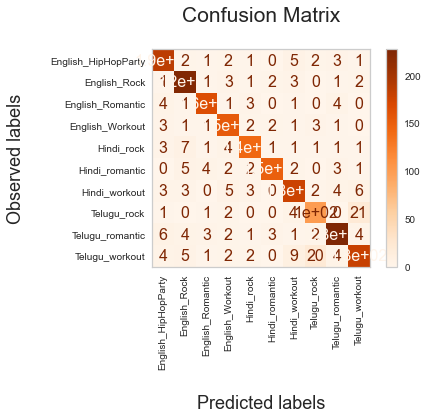

In [343]:
confusion_matrix_plot(knn_all_genres, x_test_all_genres, y_test_all_genres)

### Voting classifier

In [344]:
# Voting classifier(SVC, KNeighborsClassifier)
svc_clf = SVC(**grid_search_svc.best_params_)
knn_clf = KNeighborsClassifier(**grid_search_knn.best_params_)

voting_clf = VotingClassifier(
    estimators=[('svc',svc_clf),('knn', knn_clf),],
    voting='hard')
voting_clf.fit(x_train_all_genres, y_train_all_genres)
y_pred_vc = voting_clf.predict(x_test_all_genres)
for clf in (svc_clf, knn_clf, voting_clf):
    clf.fit(x_train_all_genres, y_train_all_genres)
    y_pred = clf.predict(x_test_all_genres)
    model=clf.__class__.__name__ if clf!=voting_clf else clf.__class__.__name__
    display_metrics(model, "All", "Genres", "With", clf, x_test_all_genres, y_test_all_genres)

SVC Classifier Model - All Genres : With Hyper-parameter Tuning
Accuracy Score  :  0.8933747412008282
Precision Score :  0.8929094734932078
Recall Score    :  0.8933747412008282
F1 Score        :  0.8924213078503924
KNeighborsClassifier Classifier Model - All Genres : With Hyper-parameter Tuning
Accuracy Score  :  0.8830227743271222
Precision Score :  0.8833673181323687
Recall Score    :  0.8830227743271222
F1 Score        :  0.882832394896733
VotingClassifier Classifier Model - All Genres : With Hyper-parameter Tuning
Accuracy Score  :  0.884575569358178
Precision Score :  0.8865438358142618
Recall Score    :  0.884575569358178
F1 Score        :  0.8836193030418401
